In [ ]:
# Dataframes and data manipulation
import pandas as pd

# Basic plotting functionality
import matplotlib.pyplot as plt
%matplotlib inline

# Create plots
import seaborn as sns

# Supress warnings for a cleaner look
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Dataset link - https://www.kaggle.com/datasets/anuchhetry/product-sales/data

# Reading in the product-sales dataset
product_sales = pd.read_csv('/contents/sales.csv')

### 2.2 Basic Exploratory Data Analysis (EDA) <a class='anchor' id='basic-exploratory-data-analysis'></a>

In [ ]:
# Print the first few lines of the dataset
product_sales.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Germany,Carretera,NaN,1513.0,3,350,529550.0,0.0,529550.0,393380.0,136170.0,2014-12-01,12,December,2014
1,Government,Germany,Paseo,NaN,1006.0,10,350,352100.0,0.0,352100.0,261560.0,90540.0,2014-06-01,6,June,2014
2,Government,Canada,Paseo,NaN,1725.0,10,350,603750.0,0.0,603750.0,448500.0,155250.0,2013-11-01,11,November,2013
3,Government,Germany,Paseo,NaN,1513.0,10,350,529550.0,0.0,529550.0,393380.0,136170.0,2014-12-01,12,December,2014
4,Government,Germany,Velo,NaN,1006.0,120,350,352100.0,0.0,352100.0,261560.0,90540.0,2014-06-01,6,June,2014


In [ ]:
# Info on column names, null values, and data types
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        647 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [ ]:
# Removing extra space from the sales column
column_rename = {' Sales': 'Sales'}
product_sales = product_sales.rename(columns=column_rename)

In [ ]:
# Basics statistics on all of the numerical columns
product_sales.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,2014-04-28 21:36:00,7.900000,2013.750000
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,2013-09-01 00:00:00,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,2013-12-24 06:00:00,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,2014-05-16 12:00:00,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,2014-09-08 12:00:00,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,NaN,3.377321,0.433322


In [ ]:
# Iterate through each column of the dataset
for column in product_sales.columns:
    # Execute code for columns that are an object datatype (not numerical)
    if product_sales[column].dtypes == 'object':
        # Print the name o the column, unique columns, and their count
        print(product_sales[column].value_counts())
        print('_'*30)

Segment
Government          300
Midmarket           100
Channel Partners    100
Enterprise          100
Small Business      100
Name: count, dtype: int64
______________________________
Country
Germany    140
Canada     140
France     140
Mexico     140
USA        140
Name: count, dtype: int64
______________________________
Product
Paseo        202
Velo         109
VTT          109
Amarilla      94
Carretera     93
Montana       93
Name: count, dtype: int64
______________________________
Discount Band
High      245
Medium    242
Low       160
Name: count, dtype: int64
______________________________
Month Name
October      140
December     105
June          70
November      70
September     70
February      35
March         35
April         35
August        35
July          35
January       35
May           35
Name: count, dtype: int64
______________________________


# **3. Distribution of Sales**<a class='anchor' id='distribution-of-sales'></a>
### 3.1 Histogram <a class='anchor' id=histogram></a>

> A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.
>     
> This function can normalize the statistic computed within each bin to estimate frequency, density or probability mass, and it can add a smooth curve obtained using a kernel density estimate, similar to 'kdeplot'.

Seaborn

#### Simple histogram plot using matplotlib to create and edit the figure, and seaborn to create the plot:

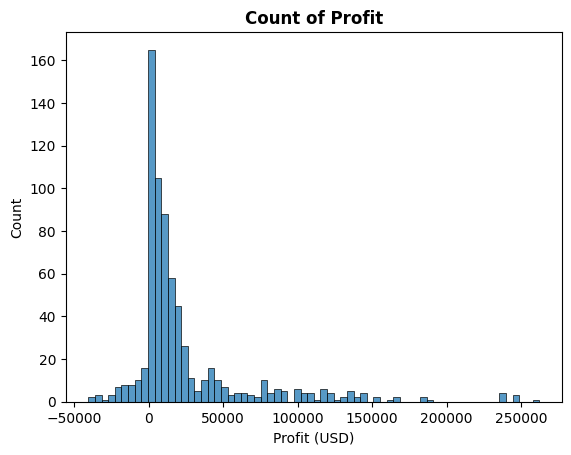

In [ ]:
# Create a histogram plot using seaborn
sns.histplot(data=product_sales, x='Profit')

# Change title and x label using matplotlib
plt.title('Count of Profit', weight='bold')
plt.xlabel('Profit (USD)')

# Show figure only (no text before it)
plt.show()

#### Adding a kde line and changing the color of the same plot:

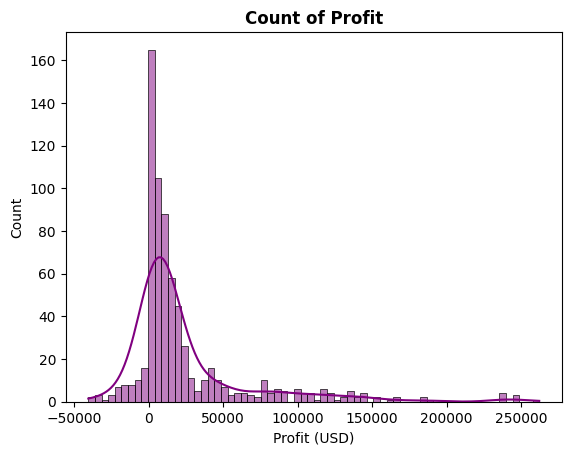

In [ ]:
# Create a histogram plot using seaborn
sns.histplot(data=product_sales, x='Profit', kde=True, color='purple')

# Change title and x label using matplotlib
plt.title('Count of Profit', weight='bold')
plt.xlabel('Profit (USD)')

# Show figure only (no text before it)
plt.show()

#### Adding a *hue* parameter to show how the profit distribution changes bwtween years and changing the color palette to make it more readable:

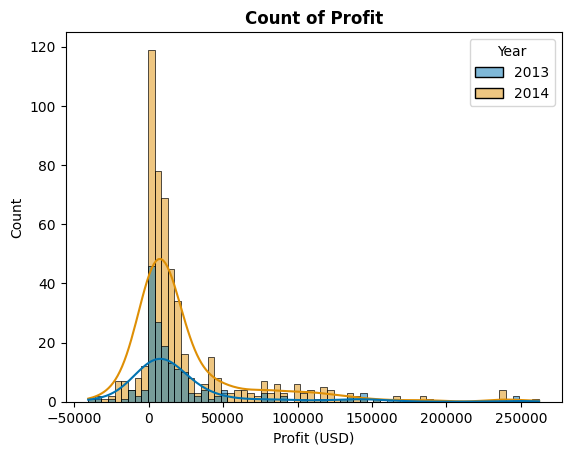

In [ ]:
# Create a histogram plot using seaborn
sns.histplot(data=product_sales,
             x='Profit',
             hue='Year',
             kde=True,
             palette=sns.color_palette('colorblind'))

# Change title and x label using matplotlib
plt.title('Count of Profit', weight='bold')
plt.xlabel('Profit (USD)')

# Show figure only (no text before it)
plt.show()

#### Using matplotlib subplots to plot every numerical column on a histogram (using different colors for each):

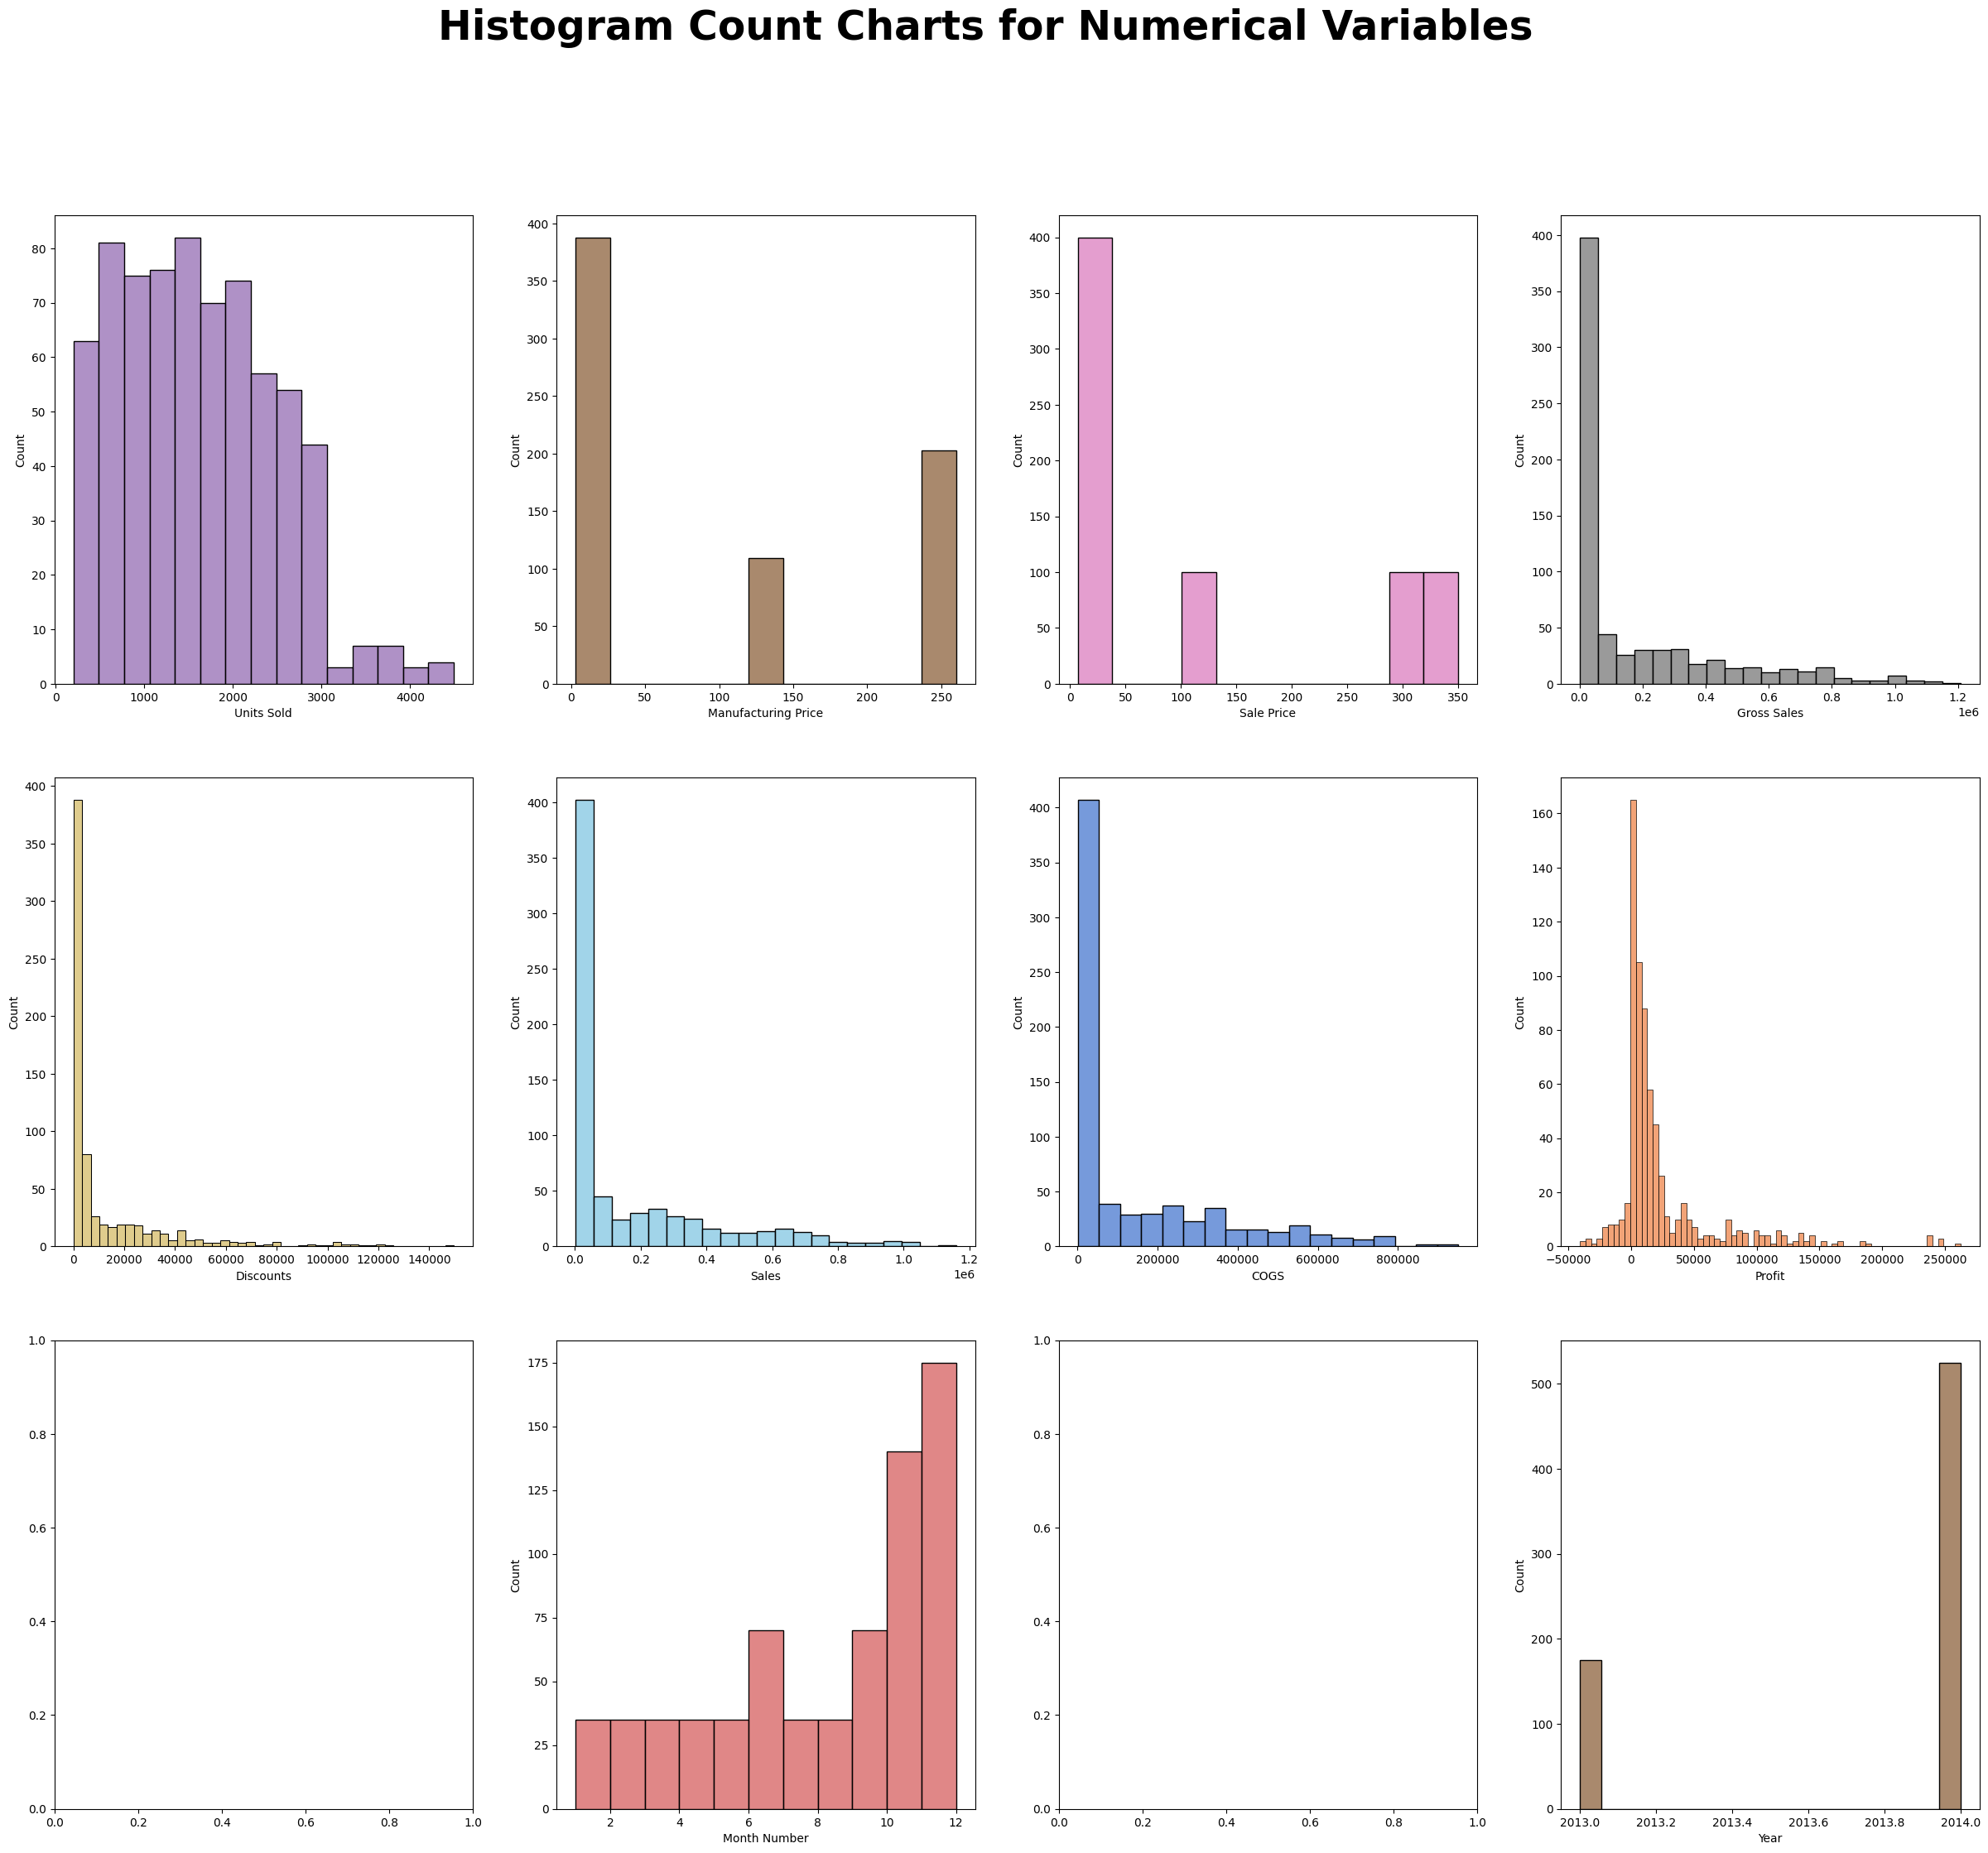

In [ ]:
# Set plot figure using matplotlib and a figure size parameter
fig, ax = plt.subplots(3, 4, figsize=(30,25))
# Create main figure title, font size, and make it bold
plt.suptitle('Histogram Count Charts for Numerical Variables',
             size=35,
             weight='bold')

# Create a list of color palettes
color = sns.color_palette('muted', n_colors=16)

# Iterate through each column of the dataset
for num, column in enumerate(product_sales.columns):
    # Set the rows and colums of the subplot to place each plot into
    rows = (num // 4) - 1
    col = num % 4

    # Execute code for columns that are a numerical datatype
    if product_sales[column].dtypes in ['float64', 'int64']:
        # Create a histogram
        sns.histplot(data=product_sales, x=column, ax=ax[rows, col], color=color[num])

### 3.2 Kernel Density Plot <a class='anchor' id=kernel-density-plot></a>

> A kernel density estimate (KDE) plot is a method for visualizing the
> distribution of observations in a dataset, analogous to a histogram. KDE
> represents the data using a continuous probability density curve in one or
> more dimensions.
>
> Relative to a histogram, KDE can produce a plot that is less cluttered and
> more interpretable, especially when drawing multiple distributions. But it
> has the potential to introduce distortions if the underlying distribution is
> bounded or not smooth. Like a histogram, the quality of the representation
> also depends on the selection of good smoothing parameters.

Seaborn

#### Basic KDE plot of the *Discounts* column:

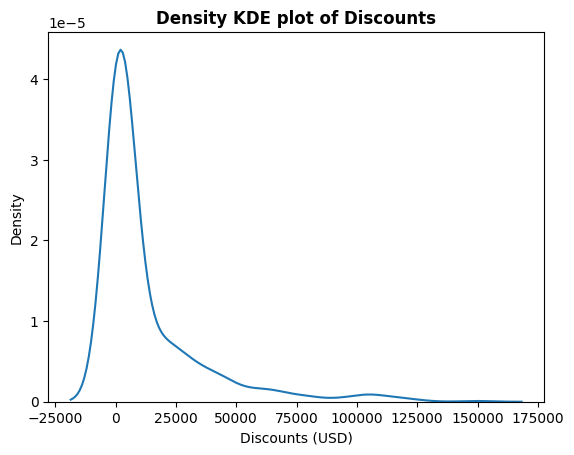

In [ ]:
# Set title
plt.title('Density KDE plot of Discounts', weight='bold')
# Change x label
plt.xlabel('Discounts (USD)')

# Create a KDE plot using seaborn
sns.kdeplot(data=product_sales, x='Discounts')

# Show figure only (no text before it)
plt.show()

### Adding lines (*hue*) for each *Sale Price* and lowering the *bw_adjust* to decrese smoothing:

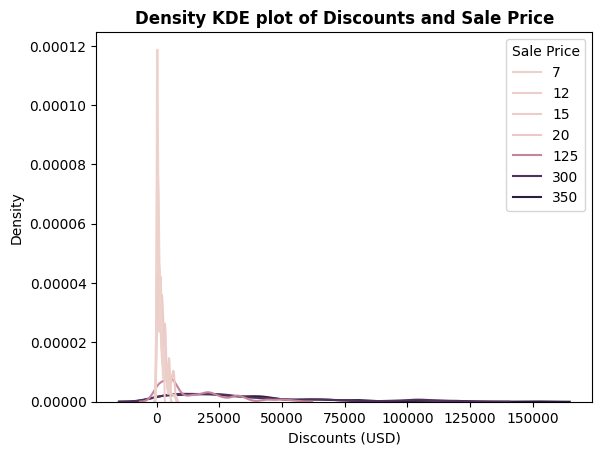

In [ ]:
# Set title
plt.title('Density KDE plot of Discounts and Sale Price', weight='bold')
# Change x label
plt.xlabel('Discounts (USD)')

# Create a KDE plot using seaborn
sns.kdeplot(data=product_sales,
            x='Discounts',
            hue='Sale Price',
            bw_adjust=0.4
           )

# Show figure only (no text before it)
plt.show()

### Filling in the plot, and changing the *palette* and *alpha* parameters to increase visability:

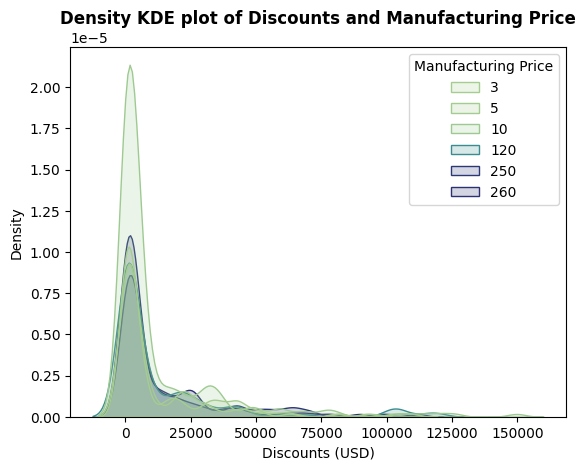

In [ ]:
# Set title
plt.title('Density KDE plot of Discounts and Manufacturing Price', weight='bold')
# Change x label
plt.xlabel('Discounts (USD)')

# Create a KDE plot using seaborn
sns.kdeplot(data=product_sales,
            x='Discounts',
            hue='Manufacturing Price',
            bw_adjust=0.4,
            fill=True,
            palette='crest',
            alpha=0.2
           )

# Show figure only (no text before it)
plt.show()

### Bar plot showing the difference in sale price by product:

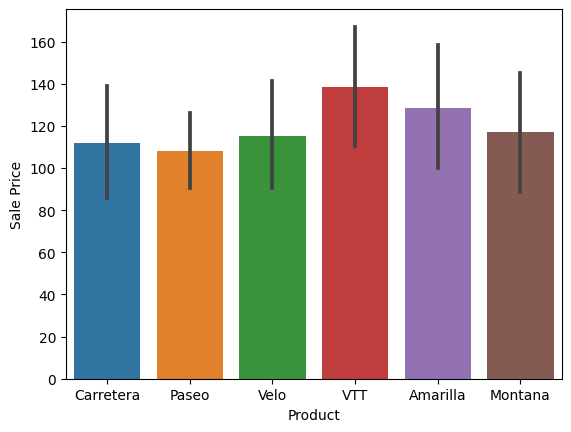

In [ ]:
# Set title
plt.title('', weight='bold')

# Make barplot of sale price by product
sns.barplot(data=product_sales, x='Product', y='Sale Price')

# Show figure only (no text before it)
plt.show()

### Adding a hue to visulize the difference in sale price for products for each year:

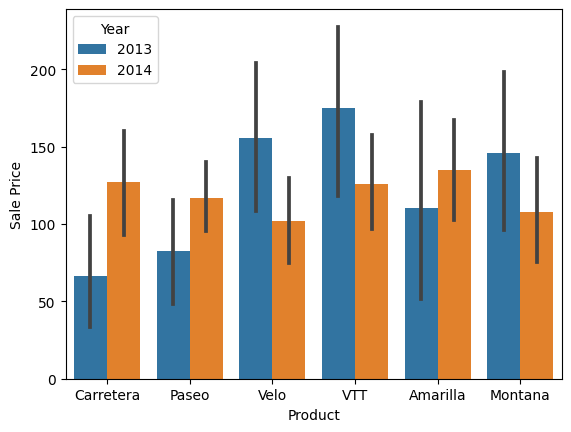

In [ ]:
# Set title
plt.title('', weight='bold')

# Make barplot of sale price by product
sns.barplot(data=product_sales, x='Product', y='Sale Price', hue='Year')

# Show figure only (no text before it)
plt.show()

#### Box plot of profit distribution for each product using *catplot*:

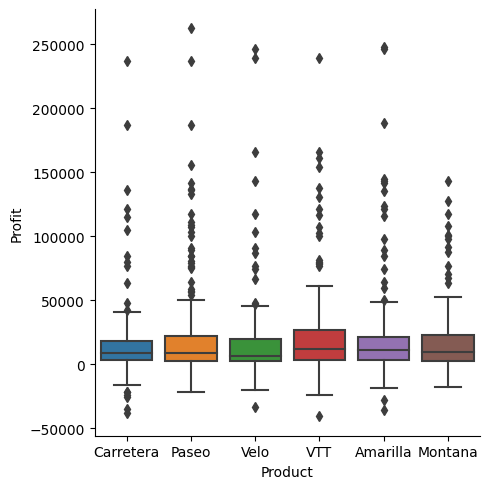

In [ ]:
# Create catplot of type 'box'
sns.catplot(data=product_sales, x='Product', y='Profit', kind='box')

# Show figure only (no text before it)
plt.show()

### Box plots of products versus relevant features:

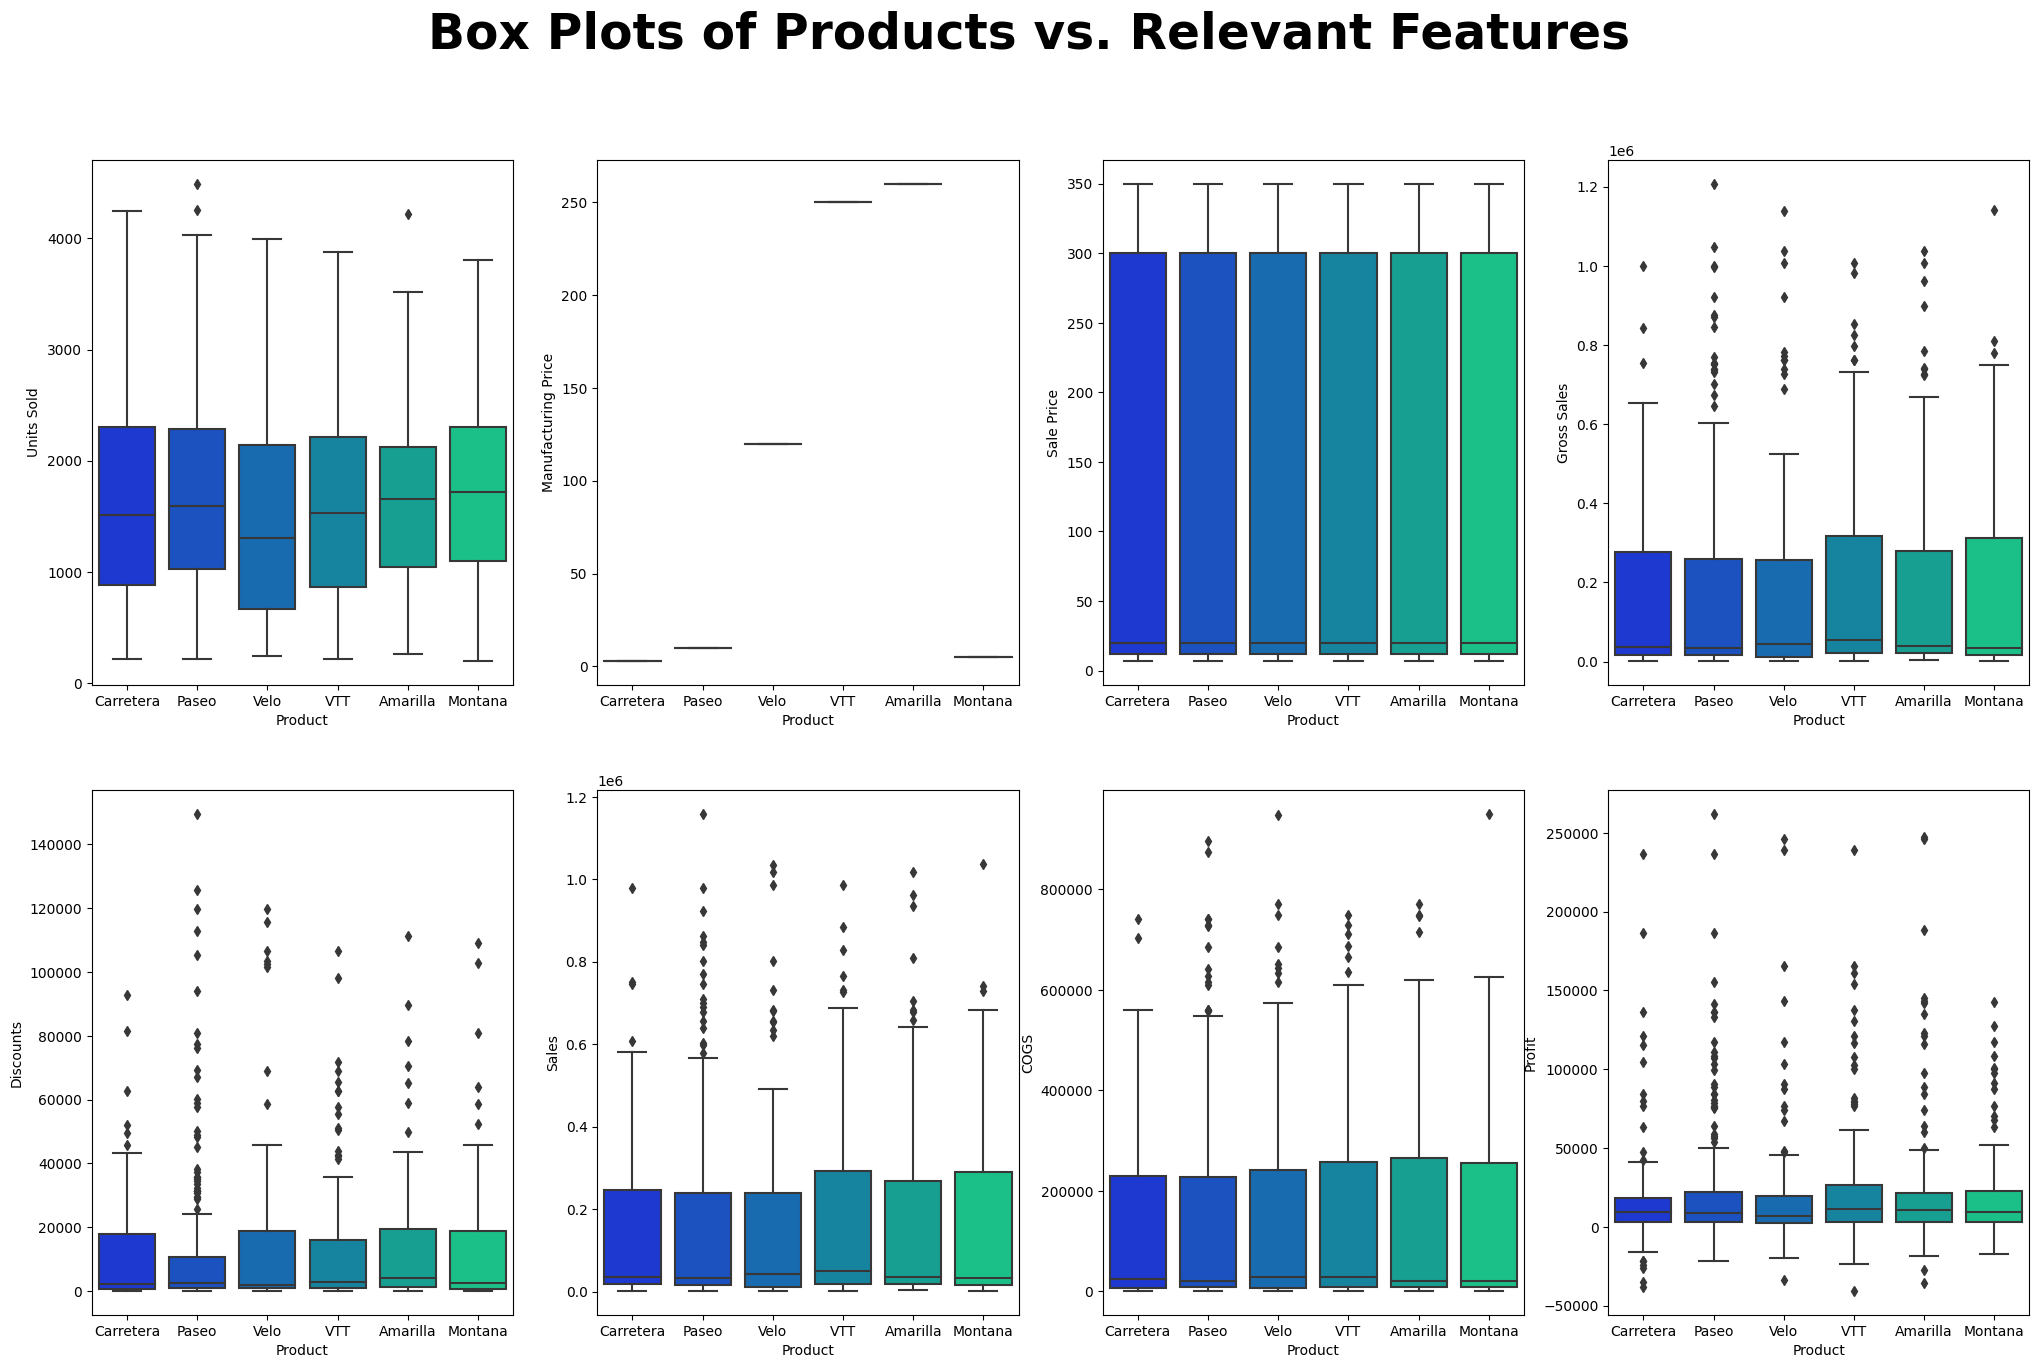

In [ ]:
# Storing relevant columns
relevant_col = ['Units Sold', 'Manufacturing Price', 'Sale Price',
                'Gross Sales', 'Discounts', 'Sales',
                'COGS', 'Profit']

# Creating subplots figure
fig, ax = plt.subplots(2,4, figsize=(25,15))
# Setting main title
plt.suptitle('Box Plots of Products vs. Relevant Features', weight='bold', size=35)

# Looping through each relevant column
for num, column in enumerate(relevant_col):

    # Creating column and row for each loop
    row = num // 4
    col = num % 4

    # Creating a boxplot with products on the x-axis and relevant features on the y-axis
    sns.boxplot(data=product_sales, x='Product', y=column, ax=ax[row, col], palette='winter')

### 4.3 Pie Chart <a class='anchor' id=pie-chart></a>

### Pie cahrt of the proportion of discounts in each discount band:

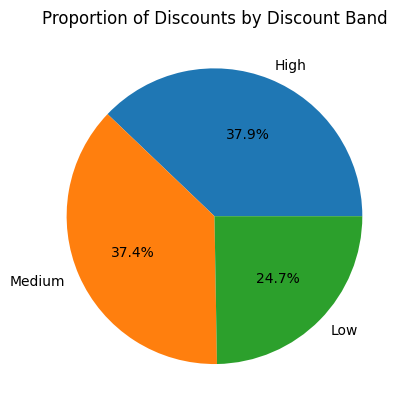

In [ ]:
# Setting up variables for pie chart
discount_band_counts = product_sales['Discount Band'].value_counts().reset_index(name='Count')
discount_band_counts['Proportion'] = discount_band_counts['Count'] / discount_band_counts['Count'].sum() * 100

# Create the pie chart
plt.pie(discount_band_counts['Proportion'], labels=discount_band_counts['Discount Band'], autopct="%1.1f%%")
plt.title('Proportion of Discounts by Discount Band')

# Show figure only (no text before it)
plt.show()

# 5. Sales Trends Over Time<a class='anchor' id='sales-trends-over-time'></a>
### 5.1 Line Plot <a class='anchor' id=line-plot></a>

### Line plot of profits over time:

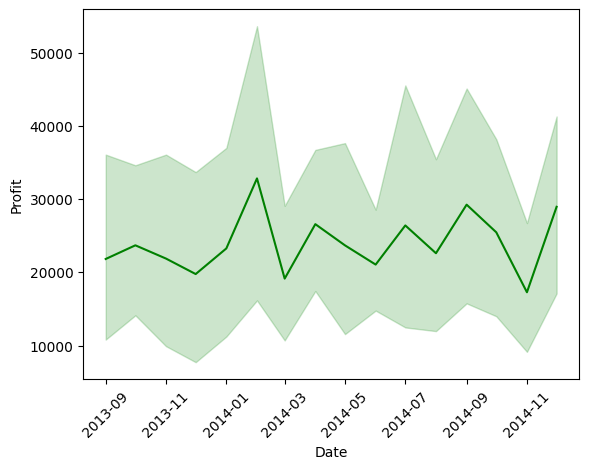

In [ ]:
# Rotate x ticks for better visability
plt.xticks(rotation=45)

# Make line plot of profits over time
sns.lineplot(data=product_sales, x='Date', y='Profit', color='green')

# Show figure only (no text before it)
plt.show()

### Line plot of profits for different sale prices for different years:

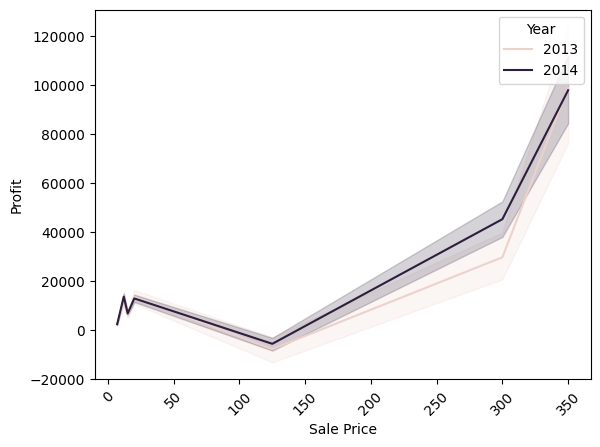

In [ ]:
# Rotate x ticks for better visability
plt.xticks(rotation=45)

# Make line plot of profits over time
sns.lineplot(data=product_sales, x='Sale Price', y='Profit', color='brown', hue='Year')

# Show figure only (no text before it)
plt.show()

### Lmplot (showing distribution and trend) for sale price and profit:

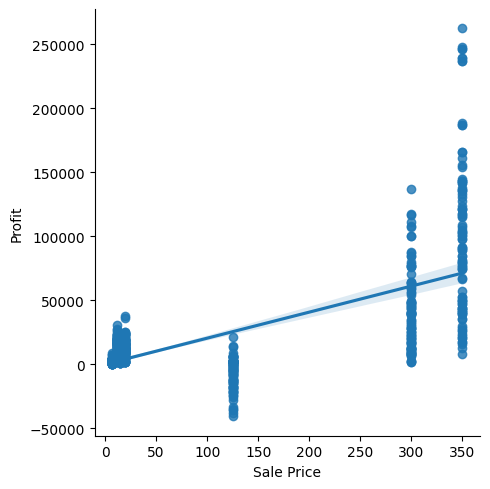

In [ ]:
# Make line plot of profits over time
sns.lmplot(data=product_sales, x='Sale Price', y='Profit')

# Show figure only (no text before it)
plt.show()

### Scatter plot with sales compared to profits:

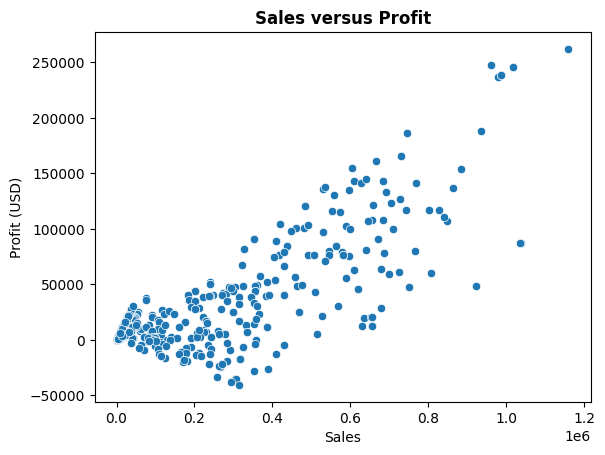

In [ ]:
# Create scatter plot
sns.scatterplot(data=product_sales, x='Sales', y='Profit')

# Change labels for better readability
plt.ylabel('Profit (USD)')
plt.title('Sales versus Profit', weight='bold')

# Show figure only (no text before it)
plt.show()

### Scatter plot comparing sales and profits along with different color and marker styles depending on the dicount band and year:

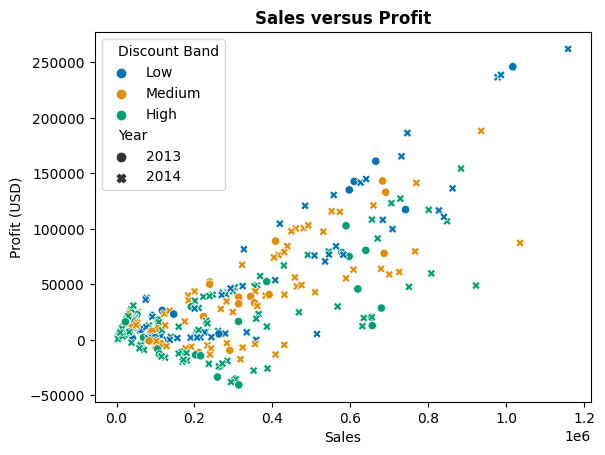

In [ ]:
# Create scatter plot
sns.scatterplot(data=product_sales,
                x='Sales',
                y='Profit',
                hue='Discount Band',
                style='Year',
                palette='colorblind')

# Change labels for better readability
plt.ylabel('Profit (USD)')
plt.title('Sales versus Profit', weight='bold')

# Show figure only (no text before it)
plt.show()

### 6.2 Pairplot <a class='anchor' id=pairplot></a>

### Same scatter plot as above but using color to represent the year and marker size to represent the discount band:

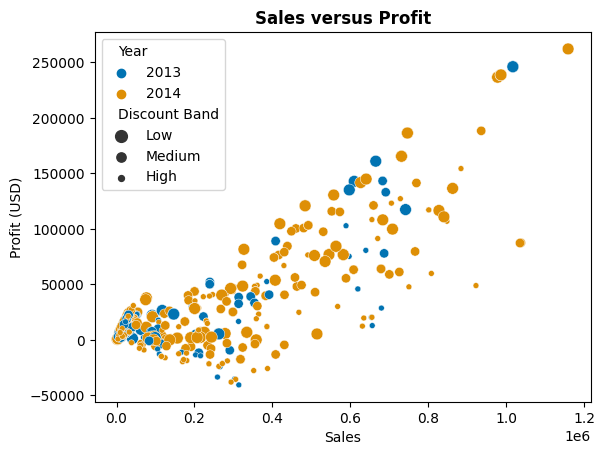

In [ ]:
# Create scatter plot
sns.scatterplot(data=product_sales,
                x='Sales',
                y='Profit',
                size='Discount Band',
                hue='Year',
                palette='colorblind')

# Change labels for better readability
plt.ylabel('Profit (USD)')
plt.title('Sales versus Profit', weight='bold')

# Show figure only (no text before it)
plt.show()

### Sales versus profits with a different marker

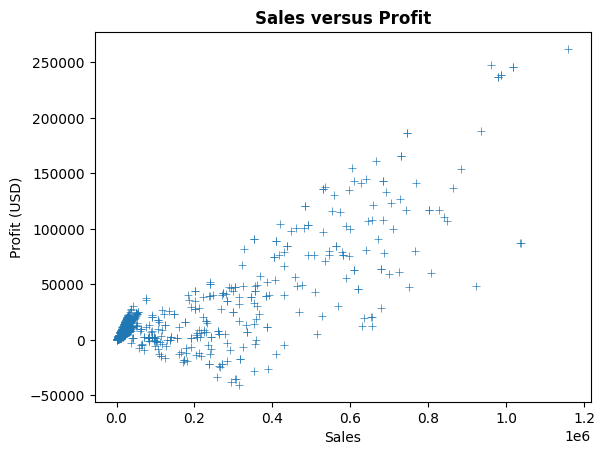

In [ ]:
# Create scatter plot
sns.scatterplot(data=product_sales,
                x='Sales',
                y='Profit',
                marker='+')

# Change labels for better readability
plt.ylabel('Profit (USD)')
plt.title('Sales versus Profit', weight='bold')

# Show figure only (no text before it)
plt.show()

# 7. Additional Plots<a class='anchor' id='additional-plots'></a>
### 7.1 Heatmap <a class='anchor' id=heatmap></a>

### Correlation matrix with all of the features in the dataset (First, converting categorical data to numerical, then plotting):

In [ ]:
# Import label enoder to convert categorical variables to numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in product_sales:
    if product_sales[col].dtype == 'object':
        product_sales[col] = le.fit_transform(product_sales[col])

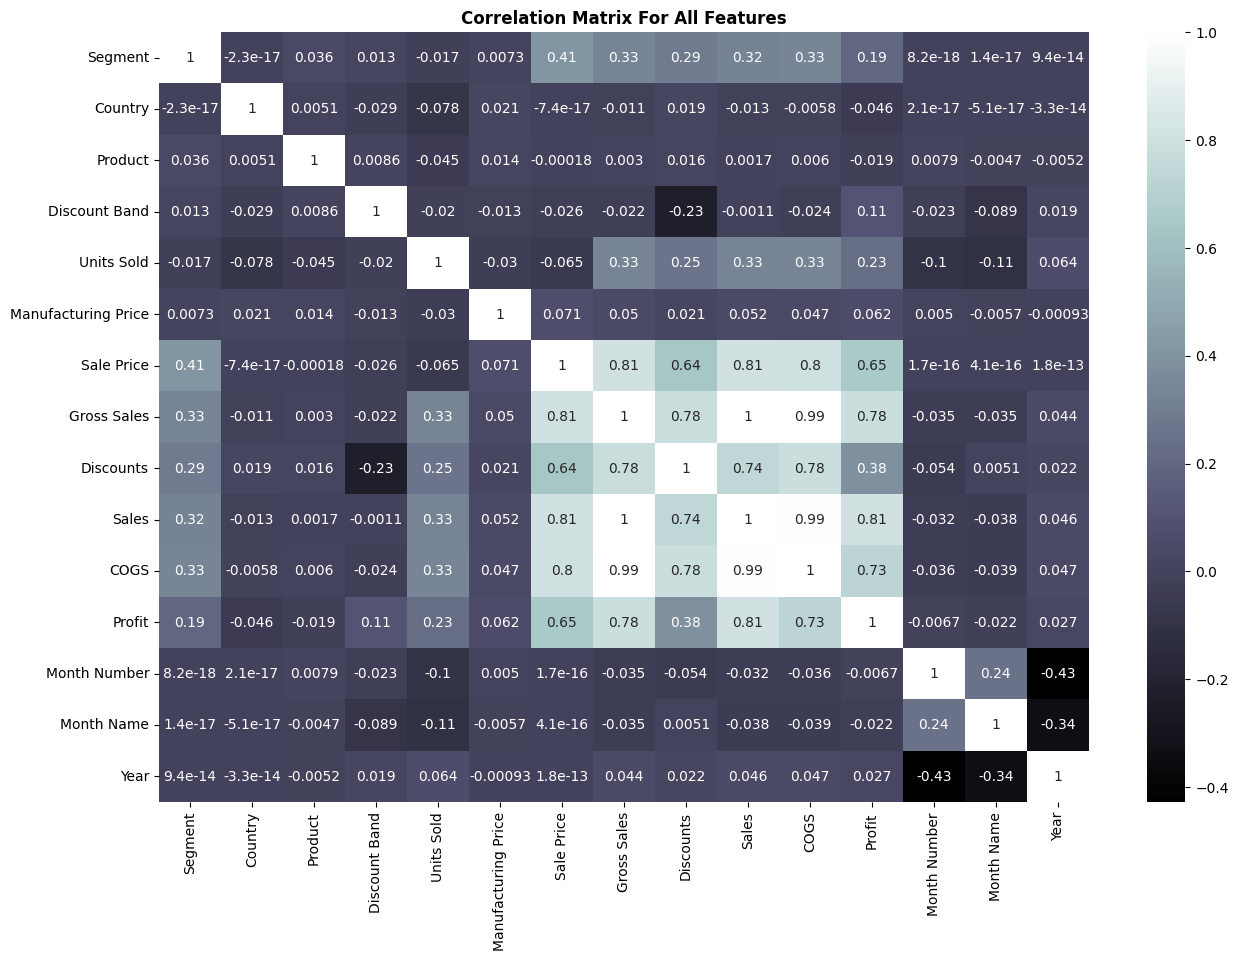

In [ ]:
# Create a correlation data frame
corr_matrix = product_sales.drop(columns='Date').corr()

# Set figure size
plt.figure(figsize=(15,10))

# Create an annotated heatmap
sns.heatmap(corr_matrix, cmap='bone', annot=True)

# Set title
plt.title('Correlation Matrix For All Features', weight='bold')

# Show figure only (no text before it)
plt.show()

### 7.2 Joint Plot <a class='anchor' id=joint-plot></a>

### Joint plot (scattered univariate with distributions) for sales and profit:

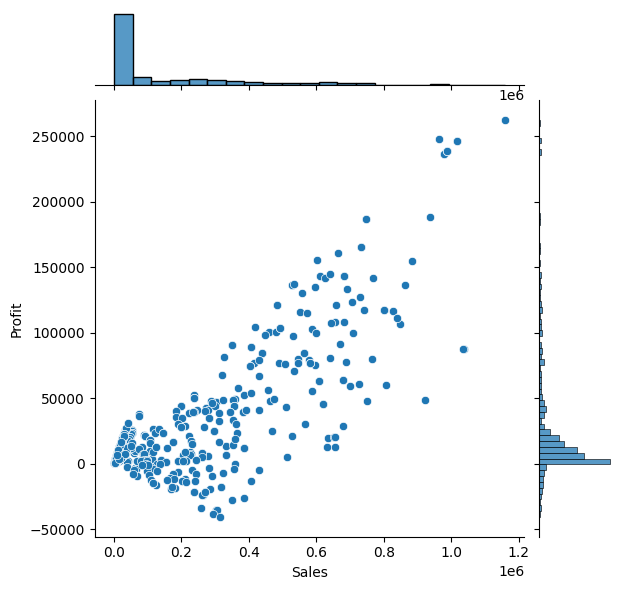

In [ ]:
# Joint plot with sales and profits
sns.jointplot(product_sales, x='Sales', y='Profit')

# Show figure only (no text before it)
plt.show()

### Adding a hue for the year:

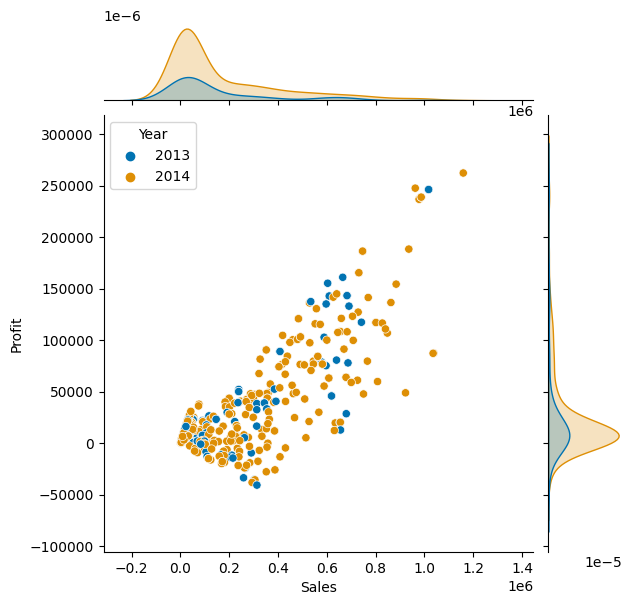

In [ ]:
# Joint plot with sales and profits and a hue for the year
sns.jointplot(product_sales,
              x='Sales',
              y='Profit',
              hue='Year',
              palette='colorblind'
             )

# Show figure only (no text before it)
plt.show()

### Adding a regression line to the join plot:

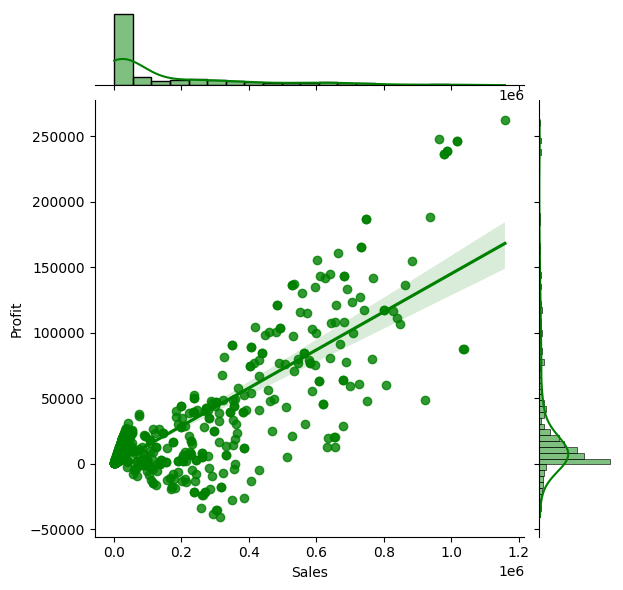

In [ ]:
# Joint plot with regression for sales and profits
sns.jointplot(product_sales,
              x='Sales',
              y='Profit',
              kind='reg',
              color='green'
             )

# Show figure only (no text before it)
plt.show()

### Changing the joint plot to a barplot hex-shaped style:

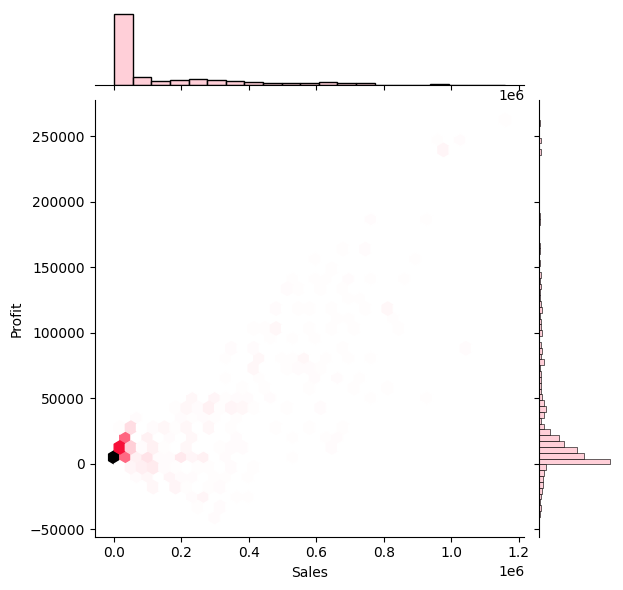

In [ ]:
# Joint plot with hex histogram for sales and profits
sns.jointplot(product_sales,
              x='Sales',
              y='Profit',
              kind='hex',
              color='pink'
             )

# Show figure only (no text before it)
plt.show()

### Violin plot showing the distribution in the recorded columns for each year:

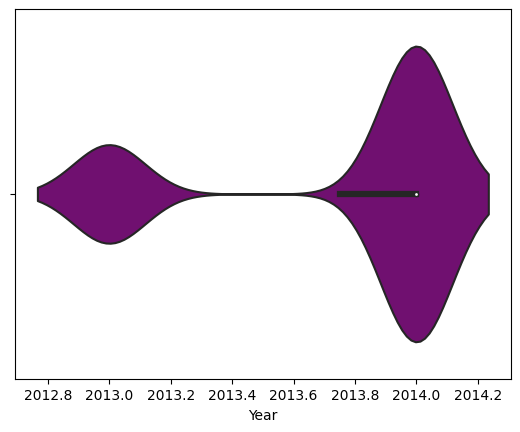

In [ ]:
# Create a violin plot
sns.violinplot(data=product_sales,
               x='Year',
               color='purple')

# Show figure only (no text before it)
plt.show()

### Violin plot showing the gross sales for each discount band:

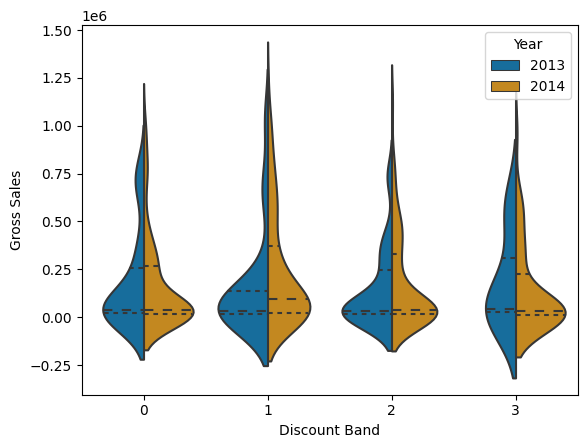

In [ ]:
# Create a violin plot
sns.violinplot(data=product_sales,
               x='Discount Band',
               y='Gross Sales',
               hue='Year',
               split=True,
               inner='quart',
               palette='colorblind')

# Show figure only (no text before it)
plt.show()

### Violin plot with quartile lines showing the gross sales for each discout band and for each year:

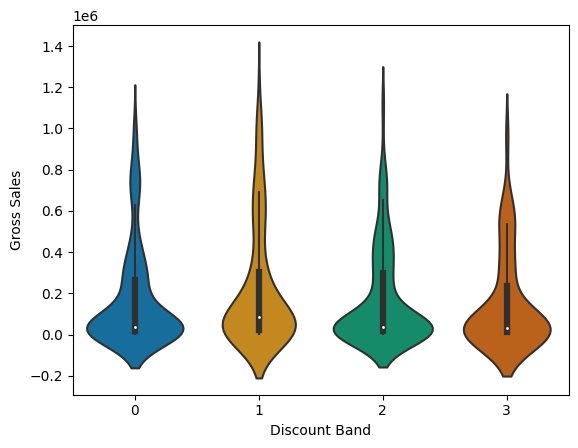

In [ ]:
# Create a violin plot
sns.violinplot(data=product_sales,
               x='Discount Band',
               y='Gross Sales',
               palette='colorblind')

# Show figure only (no text before it)
plt.show()

# **8. Add More Elements to Plots** <a class='anchor' id='add-more-elements-to-plots'></a>
### 8.1 Text and Annotations <a class='anchor' id=text-and-annotations></a>

### Regression plot of profit versus gross sales with added text on the bottom right:

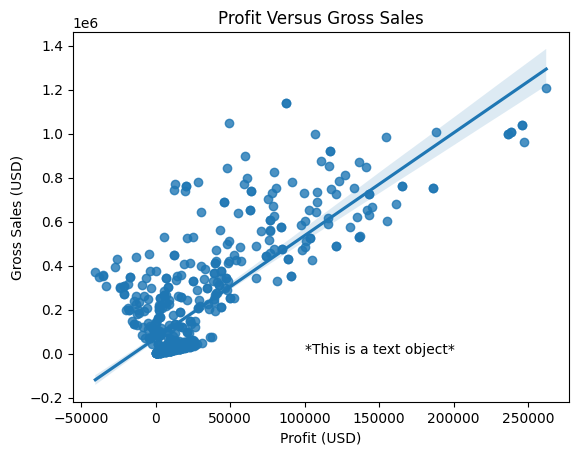

In [ ]:
# Pandas plot
sns.regplot(data=product_sales, x='Profit', y='Gross Sales')

# Customize the figure
plt.xlabel('Profit (USD)')
plt.ylabel('Gross Sales (USD)')
plt.title('Profit Versus Gross Sales')
plt.legend().remove()

# Create a text object on the currecnt axis
ax = plt.gca()
ax.text(100000, 0, "*This is a text object*")

# Show figure only (no text before it)
plt.show()

### Scatter plot of  profit versus sales with an annotation object:

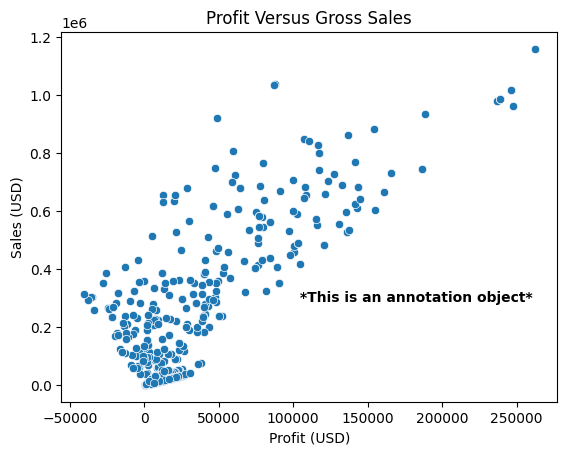

In [ ]:
# Pandas plot
sns.scatterplot(data=product_sales, x='Profit', y='Sales')

# Customize the figure
plt.xlabel('Profit (USD)')
plt.ylabel('Sales (USD)')
plt.title('Profit Versus Gross Sales')
plt.legend().remove()

# Create a text object on the currecnt axis
ax = plt.gca()
plt.annotate("*This is an annotation object*", xy=(220000,0), xycoords='data',
             ha='center', xytext=(-40,60), textcoords='offset points', weight='bold')

# Show figure only (no text before it)
plt.show()

### 8.2 Arrows and Boxes <a class='anchor' id=arrows-and-boxes></a>

### Scatter plot of profit versus discounts with an annotation inside of a box:

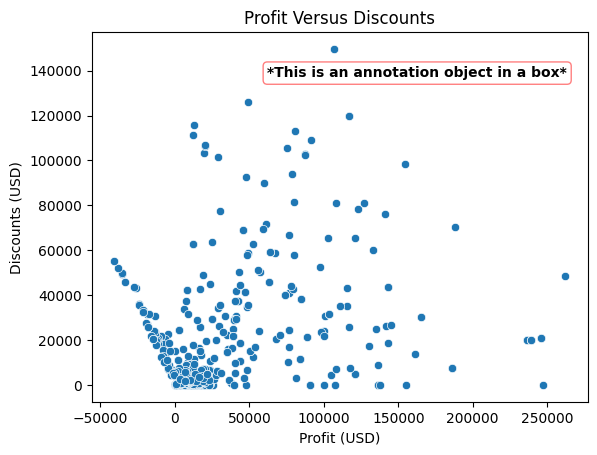

In [ ]:
# Pandas plot
sns.scatterplot(data=product_sales, x='Profit', y='Discounts')

# Customize the figure
plt.xlabel('Profit (USD)')
plt.ylabel('Discounts (USD)')
plt.title('Profit Versus Discounts')
plt.legend().remove()

# Create a text object on the currecnt axis
ax = plt.gca()
plt.annotate("*This is an annotation object in a box*", xy=(200000,100000), xycoords='data',
             bbox=dict(boxstyle="round", fc="none", ec="red", alpha=0.5), ha='center',
             xytext=(-40,60), textcoords='offset points', weight='bold')

# Show figure only (no text before it)
plt.show()

### Scatter plot of profit versus discounts with an annotation inside of a box and with an arrow:

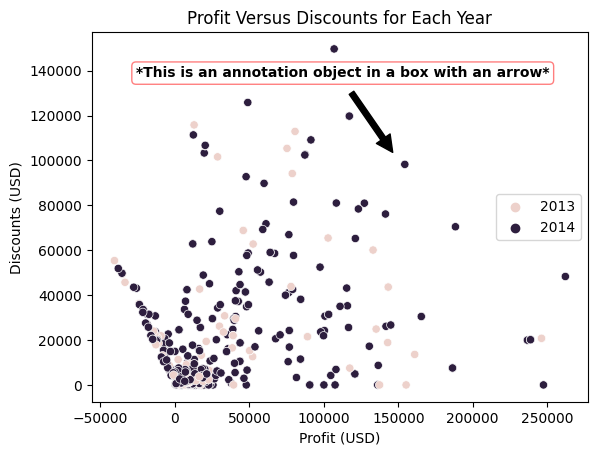

In [ ]:
# Pandas plot
sns.scatterplot(data=product_sales, x='Profit', y='Discounts', hue='Year')

# Customize the figure
plt.xlabel('Profit (USD)')
plt.ylabel('Discounts (USD)')
plt.title('Profit Versus Discounts for Each Year')
plt.legend(loc=7)

# Create a text object on the currecnt axis
ax = plt.gca()
plt.annotate("*This is an annotation object in a box with an arrow*", xy=(150000,100000), xycoords='data',
             bbox=dict(boxstyle="round", fc="none", ec="red", alpha=0.5), ha='center',
             xytext=(-40,60), textcoords='offset points', weight='bold',
             arrowprops=dict(facecolor='black', shrink=0.1))

# Show figure only (no text before it)
plt.show()

### 8.3 Lines and Segments <a class='anchor' id=lines-and-segments></a>

### Scatter plot of profit versus discounts with a random green line:

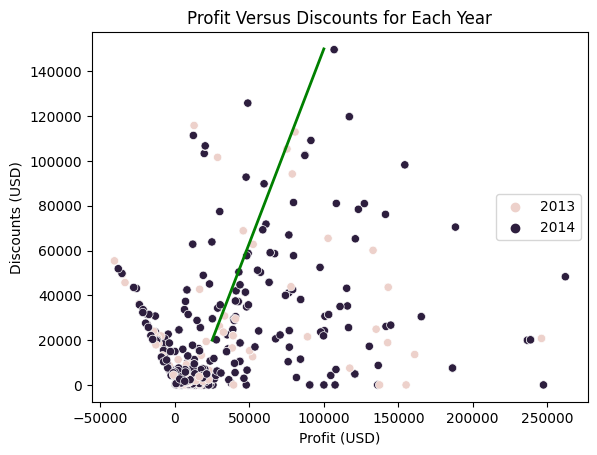

In [ ]:
# Pandas plot
sns.scatterplot(data=product_sales, x='Profit', y='Discounts', hue='Year')

# Customize the figure
plt.xlabel('Profit (USD)')
plt.ylabel('Discounts (USD)')
plt.title('Profit Versus Discounts for Each Year')
plt.legend(loc=7)

# Get current axis and add line segment
ax = plt.gca()
line = ax.plot([25000, 100000], [20000, 150000], color='green', linewidth=2)[0]

# Show figure only (no text before it)
plt.show()

### Scatter plot of profit versus discounts with a dashed line going down the middle of it:

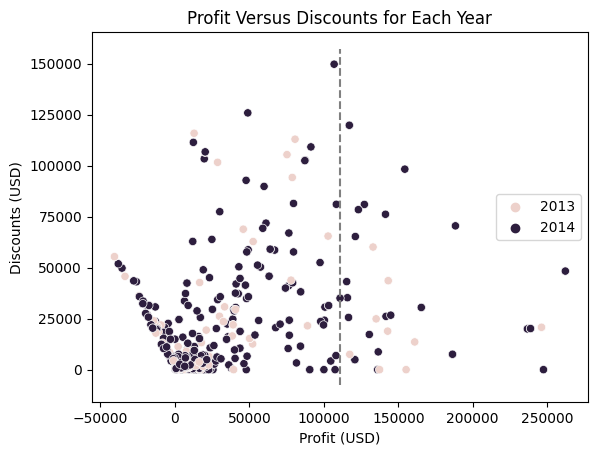

In [ ]:
# Pandas plot
sns.scatterplot(data=product_sales, x='Profit', y='Discounts', hue='Year')

# Customize the figure
plt.xlabel('Profit (USD)')
plt.ylabel('Discounts (USD)')
plt.title('Profit Versus Discounts for Each Year')
plt.legend(loc=7)

# Get plot limits (assuming you want the line to span the entire y-axis range)
ymin, ymax = plt.gca().get_ylim()  # Get minimum and maximum y-values

# Define dashed line parameters (middle x-coordinate is the average of min and max x-values)
x_middle = (plt.gca().get_xlim()[0] + plt.gca().get_xlim()[1]) / 2

# Add dashed line
ax = plt.gca()
line = ax.plot([x_middle, x_middle], [ymin, ymax], color='gray', linestyle='dashed')[0]

# Show figure only (no text before it)
plt.show()